# Simulando uma carteira de ações e comparando com o IBOVESPA

Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yf

C:\Users\rafae\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
yf.pdr_override()

Obtendo e tratando os dados

In [4]:
tickers = []
num = int(input("Quantas ações tem a sua carteira: "))
for i in range(0, num):
    ac = input("Digite o codigo da ação: ").upper()
    ac += '.SA'
    tickers.append(ac)

In [5]:
tickers

['PETR4.SA', 'VALE3.SA', 'KLBN11.SA']

In [6]:
carteira = web.get_data_yahoo(tickers, period = '5y')['Adj Close']
ibov = web.get_data_yahoo('^BVSP',period = '5y')['Adj Close']

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


Previa dos dados

In [7]:
carteira

,KLBN11.SA,PETR4.SA,VALE3.SA
Date,,,
2015-04-06,15.469792,9.936431,15.331211
2015-04-07,15.284530,10.131264,16.066908
2015-04-08,15.368738,9.806541,15.855498
2015-04-09,15.318213,10.743590,15.897782
2015-04-10,15.318213,10.956979,15.576445
...,...,...,...
2020-03-30,NaN,13.380000,41.770000
2020-03-31,NaN,13.990000,43.220001
2020-04-01,NaN,14.300000,43.369999


In [8]:
ibov

Date
2015-04-06    53737.0
2015-04-07    53729.0
2015-04-08    53661.0
2015-04-09    53803.0
2015-04-10    54214.0
               ...   
2020-03-30    74640.0
2020-03-31    73020.0
2020-04-01    70967.0
2020-04-02    72253.0
2020-04-03    69538.0
Name: Adj Close, Length: 1236, dtype: float64

Criando e salvando um grafico da cotação das ações da carteira

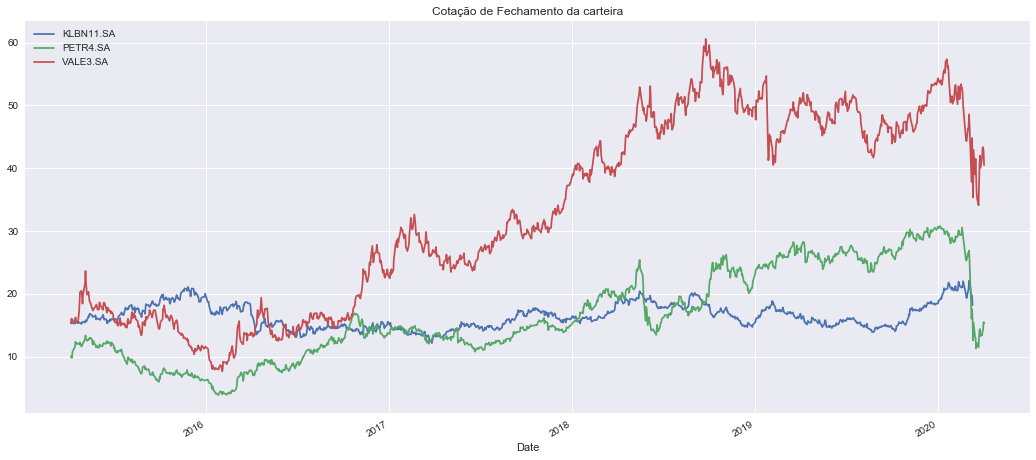

In [9]:
sns.set()
graph = carteira.plot(figsize =(18,8), title = 'Cotação de Fechamento da carteira')

In [10]:
graph.figure.savefig('carteira.png')

Normalizando a carteira

In [11]:
carteira_normalizada = (carteira/ carteira.iloc[0])*10000

In [12]:
carteira_normalizada

,KLBN11.SA,PETR4.SA,VALE3.SA
Date,,,
2015-04-06,10000.000000,10000.000000,10000.000000
2015-04-07,9880.242297,10196.079259,10479.868673
2015-04-08,9934.676440,9869.279534,10341.973782
2015-04-09,9902.016201,10812.323287,10369.554129
2015-04-10,9902.016201,11027.076899,10159.957054
...,...,...,...
2020-03-30,NaN,13465.599678,27245.075560
2020-03-31,NaN,14079.501853,28190.859135
2020-04-01,NaN,14391.485524,28288.697271


Criando e salvando um grafico da cotação das ações da carteira normalizada

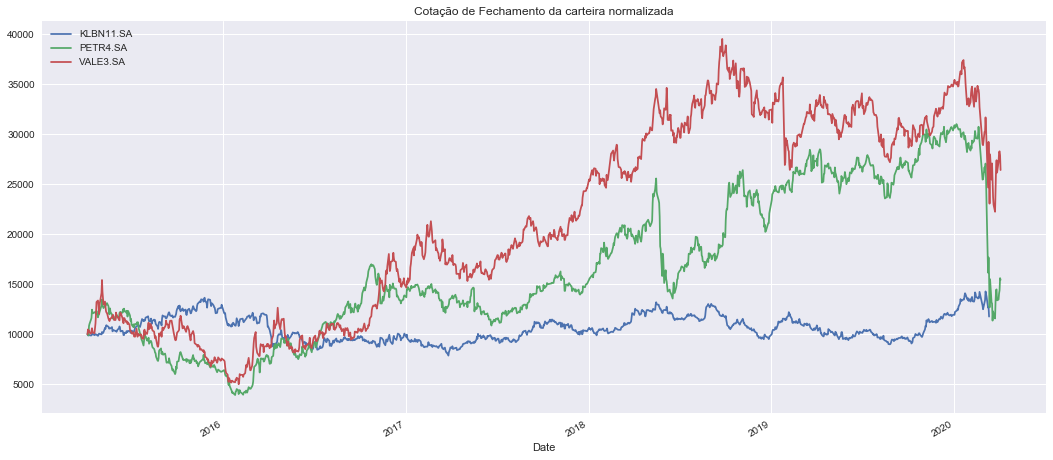

In [13]:
graph1 = carteira_normalizada.plot(figsize =(18,8), title = 'Cotação de Fechamento da carteira normalizada')

In [14]:
graph1.figure.savefig('carteira_normalizada.png')

Criando um nova coluna da carteira normalizada para analise

In [15]:
carteira_normalizada['Saldo']= carteira_normalizada.sum(axis=1)

In [16]:
carteira_normalizada

,KLBN11.SA,PETR4.SA,VALE3.SA,Saldo
Date,,,,
2015-04-06,10000.000000,10000.000000,10000.000000,30000.000000
2015-04-07,9880.242297,10196.079259,10479.868673,30556.190230
2015-04-08,9934.676440,9869.279534,10341.973782,30145.929755
2015-04-09,9902.016201,10812.323287,10369.554129,31083.893617
2015-04-10,9902.016201,11027.076899,10159.957054,31089.050153
...,...,...,...,...
2020-03-30,NaN,13465.599678,27245.075560,40710.675238
2020-03-31,NaN,14079.501853,28190.859135,42270.360988
2020-04-01,NaN,14391.485524,28288.697271,42680.182795


Normalizando o Indice Bovespa

In [17]:
ibov_normalizada = (ibov/ibov.iloc[0])*50000

In [18]:
ibov_normalizada

Date
2015-04-06    50000.000000
2015-04-07    49992.556339
2015-04-08    49929.285222
2015-04-09    50061.410202
2015-04-10    50443.828275
                  ...     
2020-03-30    69449.355193
2020-03-31    67942.013882
2020-04-01    66031.784432
2020-04-02    67228.352904
2020-04-03    64702.160523
Name: Adj Close, Length: 1236, dtype: float64

Criando e salvando um grafico do Indice Bovespa normalizado

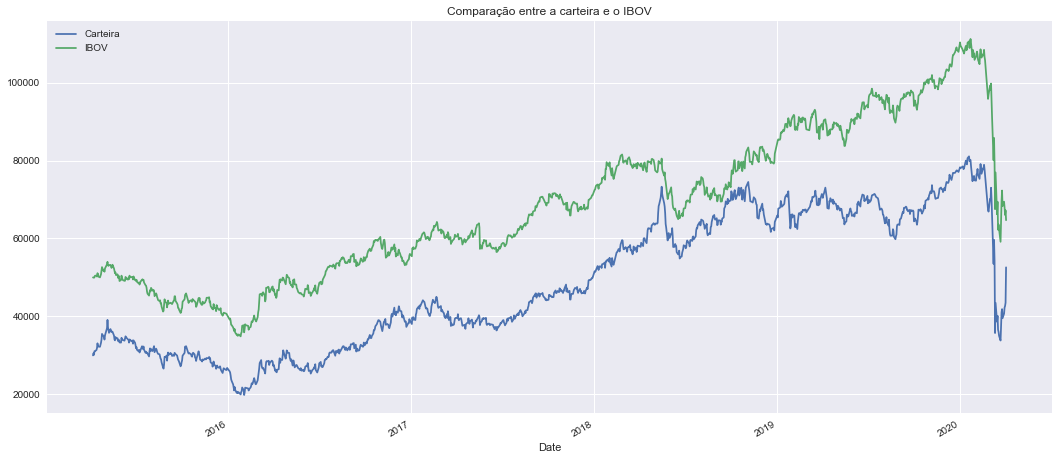

In [19]:
graph2 = carteira_normalizada['Saldo'].plot(figsize = (18,8), label = 'Carteira', title='Comparação entre a carteira e o IBOV')
ibov_normalizada.plot(label='IBOV')
plt.legend()

In [20]:
graph2.figure.savefig('Carteira_IBOV_normalizados.png')